In [15]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# def image_rotate(src, rect):
#     rect = cv2.minAreaRect(cnt)

#     if len(src.shape) != 2:
#         raise ValueError(
#             "crop_minAreaRect(): Source image should be in grayscale, and have two dimensions."
#         )

#     (_, (width, height), angle) = rect
#     if width == 0 or height == 0:
#         raise ValueError("crop_minAreaRect(): Bounding box does not exist.")

#     # Rotate image to the angle of the bounding box
#     rows, cols = src.shape
#     M = cv2.getRotationMatrix2D(
#         (height / 2.0, width / 2.0), angle, 1
#     )  # width = number of columns, and height = number of rows.
#     img_rot = cv2.warpAffine(src, M, (rows, cols))

#     # # Rotate bounding box
#     # box = cv2.boxPoints(rect)  # coordinates of four points of the box
#     # points = np.intp(cv2.transform(np.array([box]), M))[0]
#     # points[points < 0] = 0

#     # img_rot[pts[1][1] : pts[0][1], pts[1][0] : pts[2][0]]

#     # # Crop the image
#     # img_crop = img_rot[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

#     # # Make long side up
#     # if height < width:
#     #     img_crop = cv2.rotate(img_crop, cv2.ROTATE_90_CLOCKWISE)

#     return img_rot

dtype: uint8, shape: (122, 120, 3), min: 0, max: 255


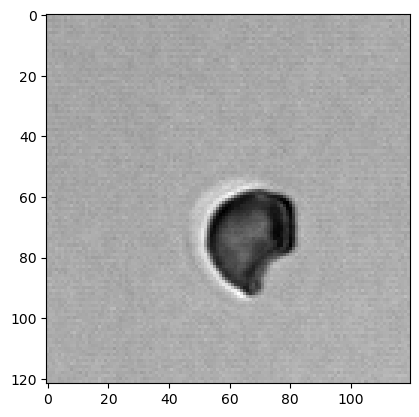

In [17]:
path = "/home/t.afanasyeva/deep_learning_anaemias/resources/images_subset/Experiment_Group_A2_1118.tif"

img = cv2.imread(path)
assert img is not None, "file could not be read, check with os.path.exists()"

print(f"dtype: {img.dtype}, shape: {img.shape}, min: {np.min(img)}, max: {np.max(img)}")
plt.imshow(img, "gray")

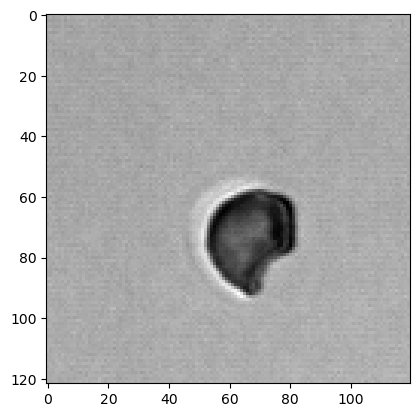

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="grey")

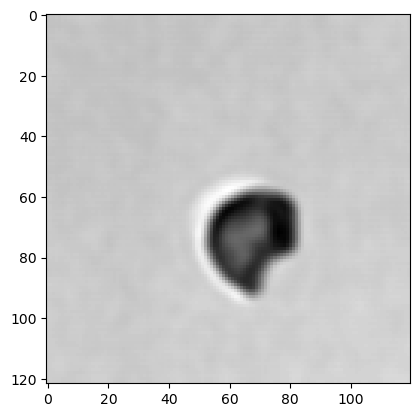

In [19]:
# Smooth image
blur = cv2.GaussianBlur(gray, (5, 5), 3)
plt.imshow(blur, cmap="grey")

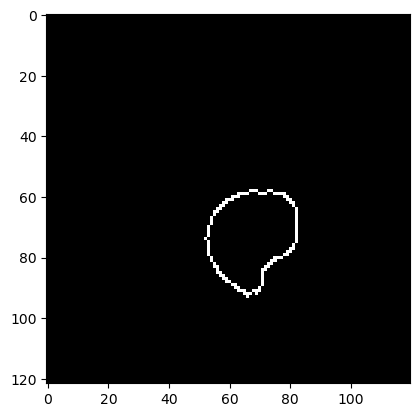

In [20]:
edges = cv2.Canny(blur, threshold1=150, threshold2=200)
plt.imshow(edges, cmap="gray")

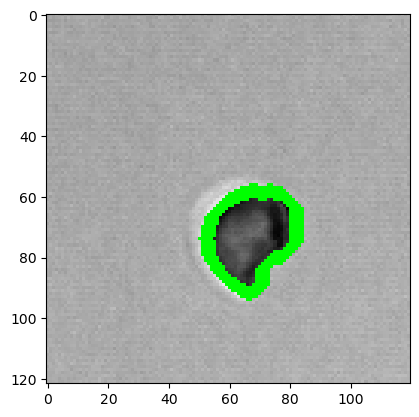

In [21]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, 1, (0, 255, 0), 3)
plt.imshow(img)

In [22]:
valid_contours = []

for i, (contour, h) in enumerate(zip(contours, hierarchy[0])):
    # Check if the contour is not inside another contour (parent index is -1)
    if h[3] == -1:
        print(h)
        area = cv2.contourArea(contour)
        # Check if the area is less than 1200 pixels
        print(area)
        if 200 < area <= 1500:
            valid_contours.append(contour)


if valid_contours:
    # Randomly select one of the valid contours
    cnt = random.choice(valid_contours)
else:
    print("No valid contours found.")

[-1 -1  1 -1]
721.5


In [23]:
# cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
# plt.imshow(img, cmap="gray")

In [24]:
# def image_crop_rotate(src, cnt):

#     M = cv2.moments(cnt)
#     # calculate x,y coordinate of center
#     cx = int(M["m10"] / M["m00"])
#     cy = int(M["m01"] / M["m00"])
#     # h=100
#     # w=100
#     image = cv2.circle(src, (cx, cy), 1, 1, 1)

#     # crop = src[cX:cX+w, cY:cY+h]
#     # Calculate the top-left and bottom-right coordinates of the square region
#     square_size = 64
#     x1 = cx - square_size // 2
#     y1 = cy - square_size // 2
#     x2 = x1 + square_size
#     y2 = y1 + square_size

#     # Ensure coordinates are within image boundaries
#     x1 = max(0, x1)
#     y1 = max(0, y1)
#     x2 = min(width, x2)
#     y2 = min(height, y2)

#     # Crop the square region
#     cropped_square = src[y1:y2, x1:x2]

#     # rect = cv2.minAreaRect(cnt)

#     # if len(src.shape) != 2:
#     #     raise ValueError(
#     #         "crop_minAreaRect(): Source image should be in grayscale, and have two dimensions."
#     #     )

#     # (_, (width, height), angle) = rect
#     # if width == 0 or height == 0:
#     #     raise ValueError("crop_minAreaRect(): Bounding box does not exist.")

#     # # Rotate image to the angle of the bounding box
#     # rows, cols = src.shape
#     # M = cv2.getRotationMatrix2D(
#     #     (height / 2.0, width / 2.0), angle, 1
#     # )  # width = number of columns, and height = number of rows.
#     # img_rot = cv2.warpAffine(src, M, (rows, cols))

#     # # # Rotate bounding box
#     # # box = cv2.boxPoints(rect)  # coordinates of four points of the box
#     # # points = np.intp(cv2.transform(np.array([box]), M))[0]
#     # # points[points < 0] = 0

#     # # img_rot[pts[1][1] : pts[0][1], pts[1][0] : pts[2][0]]

#     # # # Crop the image
#     # # img_crop = img_rot[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

#     # # # Make long side up
#     # # if height < width:
#     # #     img_crop = cv2.rotate(img_crop, cv2.ROTATE_90_CLOCKWISE)

#     return cropped_square


# rot = image_rotate(gray, cnt)
# plt.imshow(rot, cmap="gray")

In [25]:
# M = cv2.moments(cnt)
# # calculate x,y coordinate of center
# cX = int(M["m10"] / M["m00"])
# cY = int(M["m01"] / M["m00"])
# # put text and highlight the center
# cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)


# plt.imshow(img, cmap="gray")

In [26]:
# def image_rotate_crop():
#     if len(src.shape) != 2:
#       raise ValueError(
#           "crop_minAreaRect(): Source image should be in grayscale, and have two dimensions."
#       )
#   image_rotate()
#   image_crop()

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.3 ms


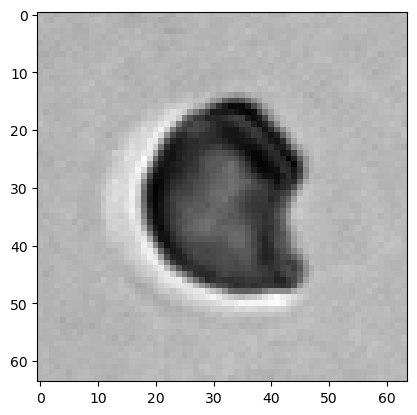

In [50]:
%%time

def image_rotate_crop(src, cnt, size=64):
    
    if len(src.shape) != 2:
      raise ValueError(
          "image_rotate_crop(): Source image should be in grayscale, and have two dimensions."
      )
    image_width, image_height = src.shape # cv2 takes rows and cols swapped 
    M = cv2.moments(cnt)
    # Calculate x,y coordinate of center
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    (_, (rect_width, rect_height), angle) = cv2.minAreaRect(cnt)
    M = cv2.getRotationMatrix2D((cx, cy), angle, 1)
    
    img_rot = cv2.warpAffine(src, M, (image_width, image_height), flags=cv2.INTER_LINEAR)

    # Calculate the top-left and bottom-right coordinates
    half_size = size // 2
    x1, y1 = max(0, cx - half_size), max(0, cy - half_size)
    x2, y2 = min(image_width, cx + half_size), min(image_height, cy + half_size)

    result = img_rot[y1:y2, x1:x2]

    # Make long side up
    if rect_height < rect_width:
        return cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)
    else:
        return result


crop = image_crop(gray, cnt)
plt.imshow(crop, cmap="gray")

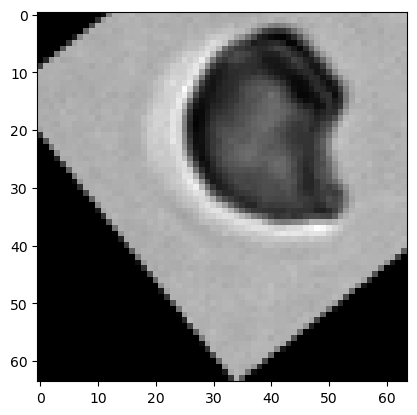

In [28]:
def image_rotate(src, cnt):

    rect = cv2.minAreaRect(cnt)
    (_, (width, height), angle) = rect

    # Rotate image to the angle of the rect
    rows, cols = src.shape
    M = cv2.getRotationMatrix2D(
        (height / 2.0, width / 2.0), angle, 1
    )  # width = number of columns, and height = number of rows.
    img_rot = cv2.warpAffine(src, M, (rows, cols), flags=cv2.INTER_LINEAR)

    # # Make long side up
    # if height < width:
    #     img_rot = cv2.rotate(img_rot, cv2.ROTATE_90_CLOCKWISE)

    return img_rot


rot = image_rotate(crop, cnt)
plt.imshow(rot, cmap="gray")